In [8]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        

6.283185307179586
6.101810435830258
0.0
6.283183274001248
-2.2828305560369545e-11
6.283185202209288
-7.507873027825907e-13
6.283185290037224
-1.0057904460707665e-13
6.2831853025924085
-2.4073874057227317e-14
6.283185305556586
-7.92935029405011e-15
6.2831853064916565
-3.1976176722144435e-15
6.283185306848594
-1.4830667200328127e-15
6.283185307004652
-7.620824069714327e-16
6.283185307080176
-4.235084898855234e-16
6.283185307119739
-2.5036446053256515e-16
6.283185307141874
-1.5560246826714512e-16


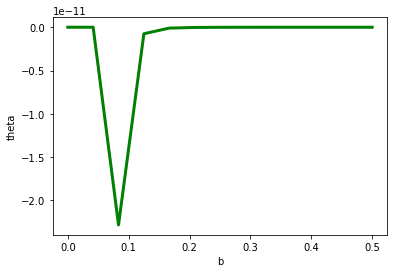

In [95]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

GM = 4*math.pi**2
r = 1                 # radius of the orbit
v0 = math.sqrt(GM/r)    # This is the condition for circular orbits 
print(v0)
theta1 = np.zeros(13)
for j in range(1,13):

    V0 = 1
    a = 1

    x0 = r                  # initial position
    y0 = (j-1)/24          # we asume we start from the x axis
    v0x = v0                # and the initial velocity
    v0y = 0.               # is perpendicular to the vector position. 

    dt = 0.001                # time step
    tmax = 4.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    energy = np.zeros(nsteps)
    

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/r)**12-(a/r)**6)
 

    p = particle2(1., x0, y0, v0x, v0y)

    for i in range(0,nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r3 = r * r * r
        fx = -4*V0*(-12*(a/r)**11+6*(a/r)**5)*p.x/r
        fy = -4*V0*(-12*(a/r)**11+6*(a/r)**5)*p.y/r
        p.euler(fx, fy, dt)

        x[i] = p.x
        y[i] = p.y
        vx[i] = p.vx
        vy[i] = p.vy
        energy[i] = 0.5*(p.vx**2+p.vy**2) - 4*V0*((a/r)**12-(a/r)**6)
        
    t = np.linspace(0.,tmax,nsteps)    
    b = np.linspace(0,0.5,13)
    print(vx[2999])
    #print(vy[2999])
    theta1[j] = math.atan(vy[39]/vx[39])
    print(theta1[j])
    #
pyplot.plot(b, theta1, color='green', ls='-', lw=3)

pyplot.xlabel('b')
pyplot.ylabel('theta');